In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy import interpolate
from scipy import linalg
from scipy.misc import derivative
# from mpl_toolkits.mplot3d import Axes3d


# Finite difference method in ODE

1. Discretizing continuous function into grid
2. Approximating exact derivatives in ODE by finite diff approximation
3. Substituting finite difference approximation into ODE to obtain finite difference equation
4. Solving system by standard procedure (?)

$$y^{''}=−4y+4x$$
y(0)=0  and $y^{'}(\pi/2)=0$

The exact solution of the problem is $y=x−sin2x$

In [2]:
def get_a_b(n):
    h = (np.pi/2-0) / n
    x = np.linspace(0, np.pi/2, n+1)
    # Get A
    A = np.zeros((n+1, n+1))
    A[0, 0] = 1
    A[n, n] = -2+4*h**2
    A[n, n-1] = 2
    for i in range(1, n):
        A[i, i-1] = 1
        A[i, i] = -2+4*h**2
        A[i, i+1] = 1

    # Get b
    b = np.zeros(n+1)
    for i in range(1, n+1):
        b[i] = 4*h**2*x[i]
    
    return x, A, b

x = np.pi/2
v = x - np.sin(2*x)

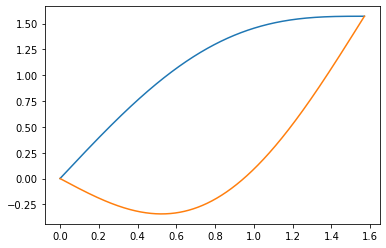

In [3]:
n = 1000

x, A, b = get_a_b(n)
y = np.linalg.solve(A, b)
plt.plot(x, y)
plt.plot(x, [i - np.sin(2*i) for i in x])
plt.show()

In [4]:
y

array([0.        , 0.00314159, 0.00628317, ..., 1.57079567, 1.57079568,
       1.57079568])

Problem: 
$$y^{''} = x + y, y(0) = 0; y(1) = 0$$
where solution is given by:
$$y(x) = \frac{sinh(x)}{sinh(1)} - x$$

In [5]:
def get_a_b(n):
    h = 1 / n
    x = np.linspace(0, 1, n+1)
    # Get A
    A = np.zeros((n+1, n+1))
    A[0, 0] = 1
    A[n, n] = 1
    for i in range(1, n):
        A[i, i-1] = 1
        A[i, i] = -2-h**2
        A[i, i+1] = 1

    # Get b
    b = np.zeros(n+1)
    for i in range(1, n):
        b[i] = h**2*x[i]
    
    return x, A, b

In [6]:
x, A, b = get_a_b(5)
y = np.linalg.solve(A, b)

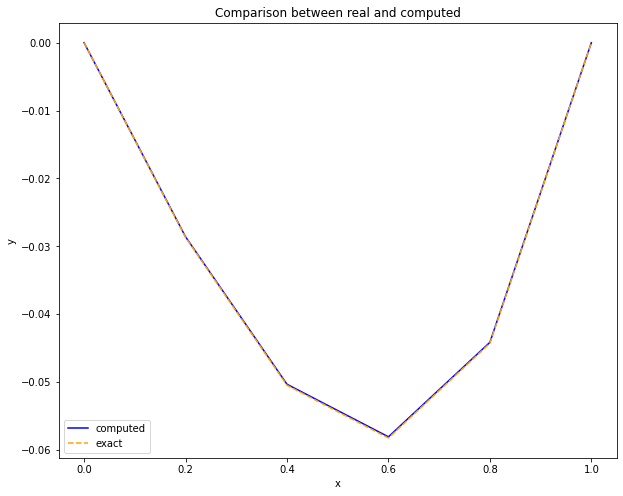

In [7]:
plt.figure(figsize = (10,8))
plt.plot(x, y, ls = '-', color = 'blue', label = 'computed')
plt.plot(x, [(np.sinh(i)/np.sinh(1) - i) for i in x], ls = '--', color = 'orange', label = 'exact')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison between real and computed')
plt.legend()
plt.show()

Okey, so now we computed PDE. We actually need to solve something more tricky, which is, ODE.

$$u = \sum_{q=0}^4\chi(\lambda_1\varphi_q(x_1) + \lambda_1\varphi_q(x_2)) \to extr$$

In [8]:
# def phi(x, q):
#     phi_ = 5*np.log(3*x + 1)
#     return phi_

# def phi_inv(x, q):
#     phi_ = 1/3 * (np.exp(x/5.) - 1)
#     return phi_

In [9]:
def phi(x, q):
    x = np.float64(x)
    if q == 4:
        psi_ = (x ** 2 + x) / 2
    elif q == 0:
        psi_ = x
    elif q == 1:
        psi_ = np.log((0.2 * q + 1) * x + 1) / np.log(0.2 * q + 2)
    elif q == 3:
        psi_ = ((3 + 2) ** x - 1) / (3 + 1)
    elif q == 2:
        psi_ = np.log((0.7 * q + 1) * x + 1) / np.log(0.7 * q + 2)
        
    return psi_
    
def phi_inv(x, q):
    x = np.float64(x)
    if q == 4:
        psi_ = np.sqrt(2 * x + 0.25) - 0.5
    elif q == 0:
        psi_ = x
    elif q == 1:
        psi_ = ((0.2 * q + 2) ** x - 1) / (0.2 * q + 1)
    elif q == 3:
        psi_ = np.log((3 + 1) * x + 1) / np.log(3 + 2) 
    elif q == 2:
        psi_ = ((0.7 * q + 2) ** x - 1) / (0.7 * q + 1)
        
    return psi_


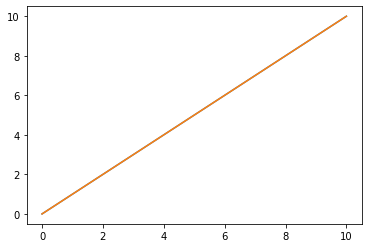

In [10]:
x = np.linspace(0, 10, 100)
plt.plot(x, [phi(i, 0) for i in x])
plt.plot(x, [phi_inv(i, 0) for i in x])
plt.show()

In [11]:
# def d_phi(x, q):
#     phi_ = 15/(3*x + 1)
#     return phi_
        
# def d2_phi(x, q):
#     phi_ = -45/(3*x + 1)**2
#     return phi_

In [12]:
def d_phi(x, q):
    if q == 4:
        Dpsi_ = (2 * x + 1) / 2
    elif q == 0:
        Dpsi_ = 1
    elif q == 1:
        Dpsi_ = (0.2 * q + 1) / (np.log(0.2 * q + 2) * ((0.2 * q + 1) * x + 1))
    elif q == 3:
        Dpsi_ = (3 + 2) ** x * np.log(3 + 2) / (3 + 1)
    elif q == 2:
        Dpsi_ = (0.7 * q + 1) / (np.log(0.7 * q + 2) * ((0.7 * q + 1) * x + 1))
        
    return Dpsi_



def d2_phi(x, q):
    if q == 4:
        Dpsi_ = 1
    elif q == 0:
        Dpsi_ = 0
    elif q == 1:
        Dpsi_ = -(0.2 * q + 1) ** 2 / (np.log(0.2 * q + 2) * ((0.2 * q + 1) * x + 1) ** 2)
    elif q == 3:
        Dpsi_ = (3 + 2) ** x * (np.log(3 + 2)) ** 2 / (3 + 1)
    elif q == 2:
        Dpsi_ = -(0.7 * q + 1) ** 2 / (np.log(0.7 * q + 2) * ((0.7 * q + 1) * x + 1) ** 2)
        
    return Dpsi_

In [13]:
def X1(z, q, lambda1, lambda2, x2):
    return phi_inv((z - lambda2 * phi(x2, q))/lambda1, q)

def ksi(z, q, k, x2, lambda1, lambda2):
    x1 = X1(z, q, lambda1, lambda2, x2)
    return lambda1 * psi(x1, k) + lambda2 * psi(x2, k)

def f(z, x2, q, lambda1, lambda2, mu):
    x1 = X1(z, q, lambda1, lambda2, x2)
    a = 2 * mu * (x1**2 - x1) + 2*mu*(x2**2 - x2) - (1 - mu)*np.pi**2 * np.sin(4*np.pi * x1**2) * np.sin(np.pi * x2)
    a += (1 - mu)*np.sin(np.pi * x2) * (8 * np.pi * np.cos(4 * np.pi *x1**2) -  64 * np.pi**2 * x1**2 * np.sin(4*np.pi * x1**2))
    return a

In [14]:
def Tau(x1, q, k):
    return d_phi(x1, q)/d_phi(x1, k) 

def d_ksi(x1, q, k):
    tau = Tau(x1, q, k)
    return 1/tau

def r(x1, q, k, lambda1):
    # r = d2_ksi
    enum = d2_phi(x1, k) * d_phi(x1, q) - d2_phi(x1, q) * d_phi(x1, k)
    denom = lambda1 * (d_phi(x1, q)**3)
    return enum/denom

def gamma(x1, x2, q, k, lambda1, lambda2):
    enum = ((lambda1 * d_phi(x1, k))**2 + (lambda2 * d_phi(x2, k))**2)
    denom = d_ksi(x1, q, k)**2
    return enum/denom

def g(x1, x2, lambda1, lambda2, q, k):
    enum = lambda1 * d2_phi(x1, k) + lambda2 * d2_phi(x2, k)
    res1 = enum/d_ksi(x1, q, k)
    
    res2 = r(x1, q, k, lambda1) / d_ksi(x1, q, k)**3 * ((lambda1 * d_phi(x1, k))**2 + (lambda2*d_phi(x2, k))** 2)
    
    return res1 - res2

In [15]:
def aT(z, p, q):
    lambda1, lambda2, x2, Nq = p['lambda1'], p['lambda2'], p['x2'], p['Nq']
    AT = np.array([gamma(X1(z, q, lambda1, lambda2, x2), x2, q, k, lambda1, lambda2) for k in range(Nq)]).reshape(1, -1)
    
    return AT


def bT(z, p, q):
    lambda1, lambda2, x2, Nq = p['lambda1'], p['lambda2'], p['x2'], p['Nq']
    BT = np.array([g(X1(z, q, lambda1, lambda2, x2), x2, lambda1, lambda2, q, k) for k in range(Nq)]).reshape(1, -1)
    
    return BT

In [16]:
def system(z, y, q, params = None):
    lambda1, lambda2, x2, Nq, mu = params['lambda1'], params['lambda2'], params['x2'], params['Nq'], params['mu']
    
    
    h = np.sin(np.array([1,2,3,4]))
    h = np.append(1 - sum(h), h).reshape(-1, 1)

    dw = - ((bT(z, params, q) @ h)[0][0] / (aT(z, params, q) @ h)[0][0]) * y[0] + (f(z, x2, q, l1, l2, mu) / (aT(z, params, q) @ h)[0][0])
    dy = y[0]
    
    return np.array([dw, dy])

In [17]:
def Euler(zspace, y0, system, q, params):
    ys = y0[:, np.newaxis].copy()
    for t in range(len(zspace) - 1):
        dt = zspace[t + 1] - zspace[t]
        t0 = zspace[t]
        t1 = zspace[t + 1]
        dy = system(t0, y0, q, params)
        y0 = y0 + dt * dy
        ys = np.append(ys, y0[:, np.newaxis], axis=1)
        
    return ys

In [18]:
def discrepancy(sol_cauchy_int):
    wmax = sol_cauchy_int[0, -1]
    wmin = sol_cauchy_int[0, 0]
    ymax = sol_cauchy_int[1, -1]
    ymin = sol_cauchy_int[1, 0]
    
    return np.array([ymax, ymin])

In [21]:
sol[3][-1]

array([-0.54536998,  1.        ])

# Задача Брату
$$\frac{\partial^2 u}{\partial x_1^2} + \frac{\partial^2 u}{\partial x_2^2} = \lambda \cdot exp(u)$$
Dsolve[{D[D[y[x, t], t], t] + D[D[y[x, t], x], x] == exp[y[x, t]], y[0, t] = cos[t]}, y[x, t], {x, t}]



$$u(0, x_2) = 0, u(1, x_2) = 0, u(x_1, 0) = 0, u(x_1, 1) = 0$$
Then, solution to that problem will be given with equation:
Here, we deal with equation:
$$\frac{\partial^2p}{\partial x^2} + \frac{\partial^2p}{\partial y^2} = \lambda exp(u(x, y))$$

Then, discretization will be:

$$\frac{p^n_{i+1, j} - 2p^n_{i, j} + p^n_{i-1, j}}{\Delta x^2} + \frac{p^n_{i+1, j} - 2p^n_{i, j} + p^n_{i-1, j}}{\Delta y^2} = exp(u(x, y))^n_{i, j}$$
And the computing scheme is following:
$$p_{i,j}^n = \frac{(exp(u(x, y))^n_{i+1, j} + p^n_{i-1, j})\Delta y^2 + (p^n_{i, j+1} + (exp(u(x, y)))^n_{i, j-1})\Delta x^2 - (exp(u(x, y)))^n_{i, j}\Delta x^2 \Delta y^2}{2(\Delta x^2 + \Delta y^2)}$$

In [27]:

import numpy as np
import matplotlib as ml
import matplotlib.pyplot as pp

In [28]:
def boundary(grid):
    x = np.linspace(0,1,len(grid))
    
    grid[0,:]  = np.interp(x,[0,1],[0,1])
    grid[:,-1] = np.interp(x,[0,1],[1,0])
    grid[-1,:] = np.interp(x,[0,1],[-1,0])
    grid[:,0]  = np.interp(x,[0,1],[0,-1])

In [29]:
def showsol(sol):
    pp.imshow(sol.T,cmap=ml.cm.Blues,interpolation='none',origin='lower')

In [30]:
def poisson_direct(gridsize,set_boundary):
    A = np.zeros(shape=(gridsize,gridsize,gridsize,gridsize),dtype='d')
    b = np.zeros(shape=(gridsize,gridsize),dtype='d')
    
    dx = 1.0 / (gridsize - 1)
    
    # discretized differential operator
    for i in range(1,gridsize-1):
        for j in range(1,gridsize-1):
            A[i,j,i-1,j] = A[i,j,i+1,j] = A[i,j,i,j-1] = A[i,j,i,j+1] = 1/dx**2
            A[i,j,i,j] = -4/dx**2
    
    # boundary conditions
    for i in range(0,gridsize):
        A[0,i,0,i] = A[-1,i,-1,i] = A[i,0,i,0] = A[i,-1,i,-1] = 1
    
    # set the boundary values on the right side
    set_boundary(b)
    
    return np.linalg.tensorsolve(A,b)

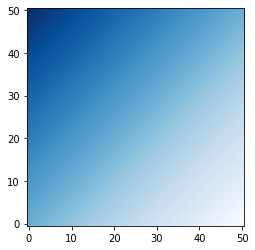

In [31]:
sol = poisson_direct(25,boundary)
pp.imshow(sol.T,cmap=ml.cm.Blues,interpolation='none',origin='lower')
showsol(poisson_direct(51,boundary))


http://www.vallis.org/salon2/lecture2-script.html

In [32]:
def jacobi(grid):
    newgrid = np.zeros(shape=grid.shape,dtype=grid.dtype)

    # apply evolution operator
    newgrid[1:-1,1:-1] = 0.25 * (grid[1:-1,:-2] + grid[1:-1,2:] +
                                 grid[:-2,1:-1] + grid[2:,1:-1])

    # copy boundary conditions
    newgrid[0,:]  = grid[0,:]
    newgrid[-1,:] = grid[-1,:]
    newgrid[:,0]  = grid[:,0]
    newgrid[:,-1] = grid[:,-1]
    
    return newgrid

In [33]:
def initgrid(gridsize):
    x = np.random.randn(gridsize,gridsize)
    boundary(x)
    
    return x

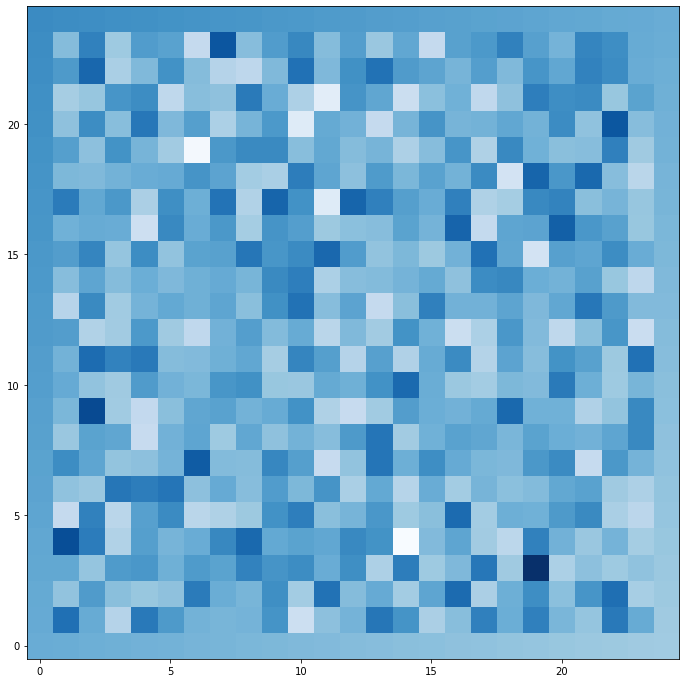

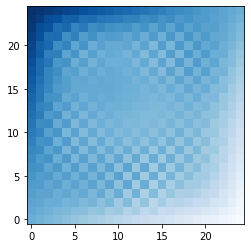

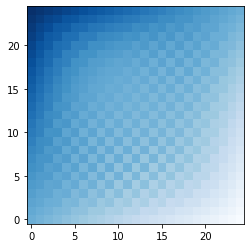

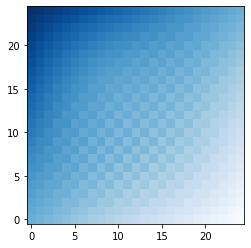

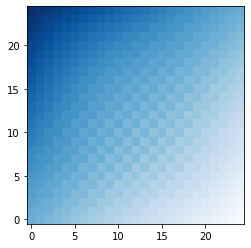

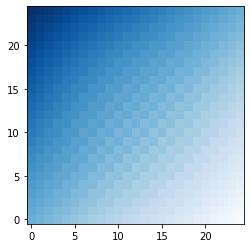

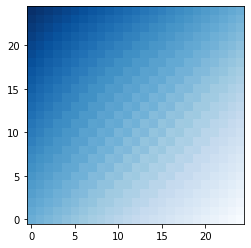

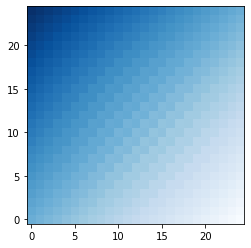

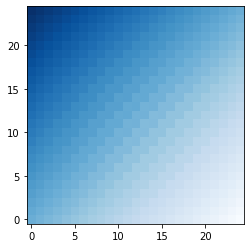

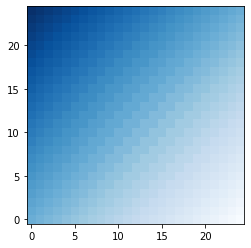

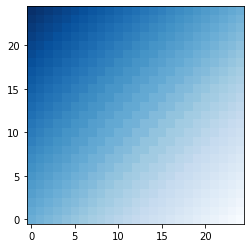

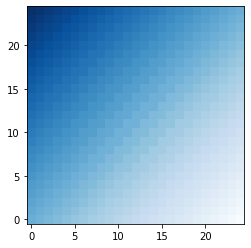

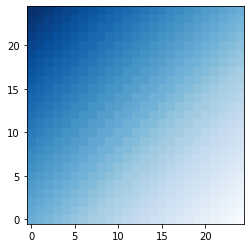

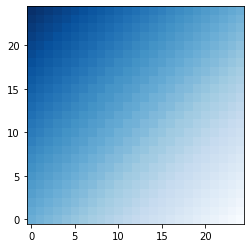

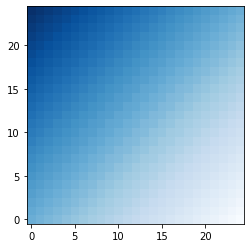

<Figure size 432x288 with 0 Axes>

In [34]:
x = initgrid(25)

pp.figure(figsize=(12,12))

for i in range(300):    
    if i % 20 == 0:
#         pp.subplot(4,4,i/20+1)
        showsol(x)
        pp.show()
#         pp.title('iter = %s' % i)
        
    x = jacobi(x)

pp.tight_layout()

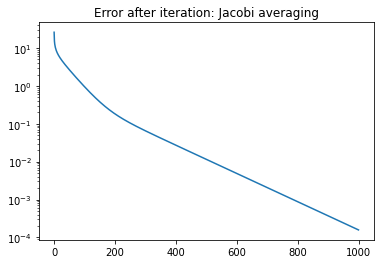

In [35]:
x = initgrid(25)
sol = poisson_direct(25,boundary)

err_jacobi = []

for i in range(1000):    
    err_jacobi.append((i,np.linalg.norm(x - sol)))
            
    x = jacobi(x)

err_jacobi = np.array(err_jacobi)
    
pp.semilogy(err_jacobi[:,0],err_jacobi[:,1])
pp.title('Error after iteration: Jacobi averaging');

In [36]:
%%timeit
x = initgrid(65)

for i in range(1000):    
    x = jacobi(x)

17.5 ms ± 328 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [37]:
import numpy as np
from numpy import sin,cos,pi
from numpy.linalg import solve

import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D


n = 100

/tmp/ipykernel_2032/670320381.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


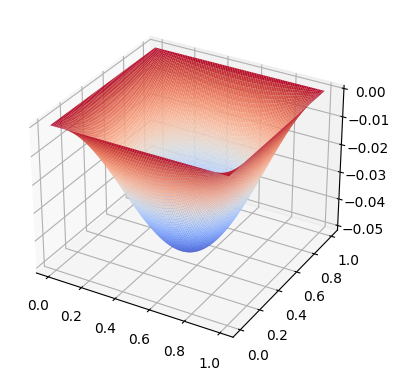

In [38]:
x1 = np.linspace(0, 1, n+1)
x2 = np.linspace(0, 1, n+1)

xx1, xx2 = np.meshgrid(x1, x2)
u_ = -(np.sin(np.pi * xx1) * np.sin(np.pi * xx2))/(2 * np.pi**2)

fig = plt.figure(figsize=(5, 3.5), dpi = 100)
ax = Axes3D(fig)
surf = ax.plot_surface(xx1, xx2, u_[:], rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased = True)
# ax.set_zlim(-0.015, 0.015)
plt.show()

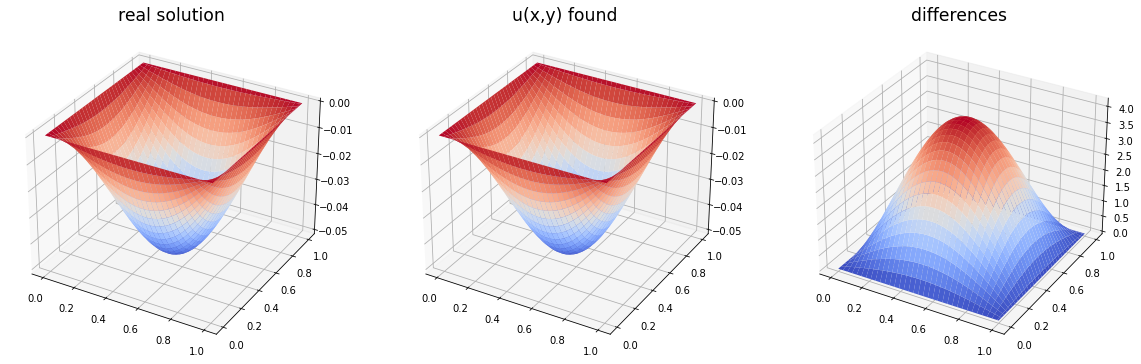

In [43]:
# build the coefficient matrix
I = np.eye(n-1)
B = -np.diag(np.ones(n-2),1) - np.diag(np.ones(n-2),-1)
A = -(4*np.eye((n-1)**2) + np.kron(I,B) + np.kron(B,I))*n**2

# build the right hand side
x = np.arange(0,1,1/n)[None,1:]
y = np.arange(0,1,1/n)[1:,None]
F = sin(pi*x) * sin(pi*y)   # right hand side in "matrix form"
f = F.ravel(order='F')                # reshape right hand side

# solve the system
u = solve(A,f)                        # solve the system
U = u.reshape((n-1,n-1),order='F')  # reshape solution to "matrix form"

# plot solution surfaces

x_full = np.hstack([[[0]],x,[[1]]])
y_full = np.vstack([[[0]],y,[[1]]])
F_full = np.zeros((n+1,n+1))
F_full[1:-1,1:-1] = F
U_full = np.zeros((n+1,n+1))
U_full[1:-1,1:-1] = U



# differences = abs(U_full - u_)
differences = u_ - U_full
fig, ax = plt.subplots(1,3,figsize = (20,10), subplot_kw={"projection": "3d"})
ax[0].plot_surface(x_full,y_full,u_,cmap=cm.coolwarm)
ax[0].set_title(r'real solution',fontsize = 'xx-large')
ax[1].plot_surface(x_full,y_full,U_full,cmap=cm.coolwarm)
ax[1].set_title(r'u(x,y) found',fontsize = 'xx-large')
ax[2].plot_surface(x_full,y_full,differences,cmap=cm.coolwarm)
ax[2].set_title(r'differences',fontsize = 'xx-large')

plt.show()

/tmp/ipykernel_2032/4085810730.py:10: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


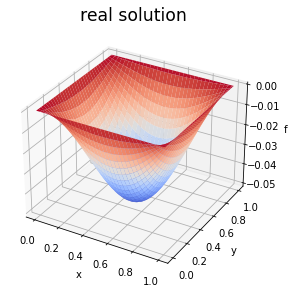

/tmp/ipykernel_2032/4085810730.py:23: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


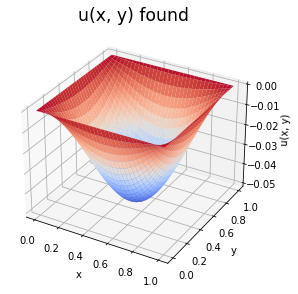

NameError: name 'y_full_' is not defined

In [40]:
# fig = plt.figure(figsize=(5, 3.5), dpi = 100)
# ax = Axes3D(fig)
# surf = ax.plot_surface(xx1, xx2, u_[:], rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased = True)
# # ax.set_zlim(-0.015, 0.015)
# plt.show()



fig = plt.figure(figsize = (5, 3.5))
ax = Axes3D(fig)
surf = ax.plot_surface(x_full,y_full,u_,cmap=cm.coolwarm)
ax.set_title(r'real solution',fontsize = 'xx-large')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f')
plt.show()

# fig, ax = plt.subplots(1,1, figsize = (20,10), subplot_kw={"projection": "3d"})
# ax[0].plot_surface(x_full,y_full,U_full,cmap=cm.coolwarm)
# ax[0].set_title(r'u(x,y) found',fontsize = 'xx-large')
# plt.show()
fig = plt.figure(figsize = (5, 3.5))
ax = Axes3D(fig)
surf = ax.plot_surface(x_full,y_full,U_full,cmap=cm.coolwarm)
ax.set_title(r'u(x, y) found',fontsize = 'xx-large')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y)')
plt.show()

# fig, ax = plt.subplots(1,1, figsize = (20,10), subplot_kw={"projection": "3d"})
# ax[0].plot_surface(x_full,y_full,differences,cmap=cm.coolwarm)
# ax[0].set_title(r'differences',fontsize = 'xx-large')
# plt.show()

xv, yv = np.meshgrid(x_full[0], y_full_, indexing='xy')
fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection='3d')
ax.plot_surface(xv, yv, differences,cmap='viridis', edgecolor='none')
ax.set_title('Error surface')
# ax.set_zticks([-0.00000417/2, 0, 0.00000417])
ax.set_zlabel('$difference$', rotation = 0)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [ ]:
differences = U_full - u_
differences

In [ ]:
fig = plt.figure(figsize=(5, 3.5), dpi = 100)

ax = Axes3D(fig)
surf = ax.plot_surface(x_full,y_full,differences, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased = True)
ax.set_zlim(-0.00001, 0.000001)
plt.show()

# plot_surface(x_full,y_full,differences,cmap=cm.coolwarm)

In [ ]:
differences.max()

In [ ]:
def plot_surface(x, y, z):
    # Source: https://stackoverflow.com/questions/51891538/create-a-surface-plot-of-xyz-altitude-data-in-python
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_trisurf(x, y, z, color='white', edgecolors='grey', alpha=0.5)
    ax.scatter(x, y, z, c='red')
    ax.view_init(35, 20)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('NTG')
    plt.show()

In [ ]:
y_full

In [ ]:
y_full_ = [elem[0] for elem in y_full]

In [ ]:
plot_surface(x_full[0],y_full_,differences)

# Bratu problem

$$\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} = \lambda e^u$$
with boundary conditions:
$$u = 0 \text{ on } \partial \Omega$$
Then, we will have equations:
$$F(u_{i, j}) = u_{i-1, j} + u_{i, j+1} - 4u_{i, j} + u_{i, j-1} + u_{i+1, j} + h^2\lambda e^{u_{i, j}}$$

In [51]:
def x1(z, q, l1, l2, x2):
    z = np.float64(z)
    return psi_inv((z - l2 * psi(x2, q)) / l1, q)



def r(x1, q, k, l1):
    '''r=d2 ksi'''
    enum = D2_psi(x1, k) * D_psi(x1, q) - D2_psi(x1, q) * D_psi(x1, k)
    enum /= l1 * (D_psi(x1, q)) ** 3
    
    return enum



def D_ksi(x1, q, k):
    
    def tau(x1, q, k):
        enum = D_psi(x1, q) / D_psi(x1, k)
        return enum
    
    return 1 / tau(x1, q, k)


def gamma(x1, x2, q, k, l1, l2):
    enum =  ((l1 * D_psi(x1, k)) ** 2 + (l2 * D_psi(x2, k)) ** 2)
    enum /= D_ksi(x1, q, k) ** 2
    
    return enum


def g(x1, x2, q, k, l1, l2):
    enum = (l1 * D2_psi(x1, k) + l2 * D2_psi(x2, k)) / D_ksi(x1, q, k)
    enum -= (r(x1, q, k, l1) / (D_ksi(x1, q, k) ** 3)) * ((l1 * D_psi(x1, k)) ** 2 + (l2 * D_psi(x2, k)) ** 2)
    
    return enum




def ksi(z, x2, l1, l2, q, k):
    z = np.float64(z)
    
    return l1 * psi(x1(z, q, l1, l2, x2), k) + l2 * psi(x2, k) 


In [52]:
def aT(z, p, q):
    l1, l2, x2, Nq = p['l1'], p['l2'], p['x2'],  p['Nq']
    AT = np.array([gamma(x1(z, q, l1, l2, x2), x2, q, k, l1, l2)
                  for k in range(Nq)]).reshape(1, -1)
    return AT

def bT(z, p, q):
    l1, l2, x2, Nq = p['l1'], p['l2'], p['x2'],  p['Nq']
    BT = np.array([g(x1(z, q, l1, l2, x2), x2, q, k, l1, l2)
                  for k in range(Nq)]).reshape(1, -1)
    return BT

In [53]:
def system(z, y, q, params=None):
    l1, l2, x2, Nq, mu = params['l1'], params['l2'], params['x2'],  params['Nq'], params['mu']
    one = np.ones(Nq)
    h = one / np.linalg.norm(one, ord=2) ** 2
    h = h.reshape(-1, 1)
    dw = - ((bT(z, params, q) @ h)[0][0] / (aT(z, params, q) @ h)[0][0]) * y[0] + (- mu * np.exp(y[1]) / (aT(z, params, q) @ h)[0][0])
    dy = y[0]
    
    return np.array([dw, dy])

In [54]:
def Euler(zspace, y0, system, q, params):
    ys = y0[:, np.newaxis].copy()
    for t in range(len(zspace) - 1):
        dt = zspace[t + 1] - zspace[t]
        t0 = zspace[t]
        t1 = zspace[t + 1]
        dy = system(t0, y0, q, params)
        y0 = y0 + dt * dy
        ys = np.append(ys, y0[:, np.newaxis], axis=1)
        
    return ys



def runge_kutta(time_steps, y0, system, q, params):
    ys = y0[:, np.newaxis].copy()
    for t in range(len(time_steps) - 1):
        dt = time_steps[t + 1] - time_steps[t]
        t0 = time_steps[t]
        t1 = time_steps[t + 1]
        k1 = system(t0, y0, q, params) * dt
        k2 = system(t0 + dt / 2, y0 + 1 / 2 * k1, q, params) * dt
        k3 = system(t0 + dt / 2, y0 + 1 / 2 * k2, q, params) * dt
        k4 = system(t1, y0 + k3, q, params) * dt
        y0  = y0 + (k1 + 2 * k2 + 2 * k3 + k4) / 6
        ys = np.append(ys, y0[:, np.newaxis], axis=1)
        
    return ys

In [55]:
def discrepancy(sol_cauchy_int):
    wmax = sol_cauchy_int[0, -1]
    wmin = sol_cauchy_int[0, 0]
    ymax = sol_cauchy_int[1, -1]
    ymin = sol_cauchy_int[1, 0]
    
    return np.array([ymax, ymin])

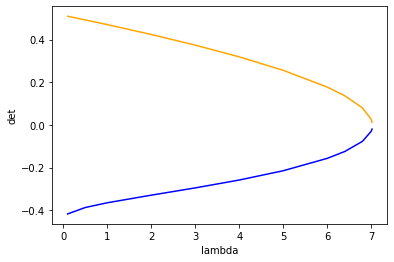

In [65]:
plt.plot(xs_upper, ys_upper, color = 'orange')
plt.plot(xs_lower, ys_lower, color = 'blue')
plt.xlabel('lambda')
plt.ylabel('det')
plt.show()

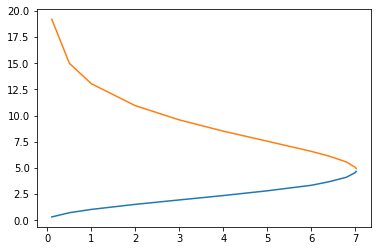

In [70]:
plt.plot(list(lambda_theta1.keys())[:-1], list(lambda_theta1.values())[:-1])
plt.plot(list(lambda_theta2.keys())[:-1], list(lambda_theta2.values())[:-1])
# plt.ylim((0, 8))
plt.show()